### Linear fit example as a stub

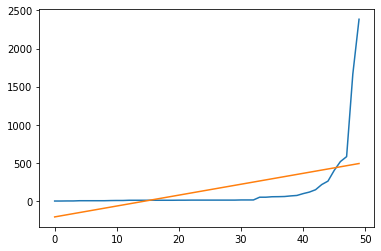

In [2]:
from pprint import pprint as pp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from lmfit.models import LinearModel
sys.path.append(os.path.abspath(os.path.join('..')))
from lib.etl import df_all, df_us

_df = df_us.groupby('day').sum().reset_index()
_df = _df[['day', 'cases']]
model = LinearModel()
params = model.make_params()
result = model.fit(_df.cases, params, x=_df.day.to_list())
plt.plot(_df.day, _df.cases)
plt.plot(_df.day, result.best_fit)
plt.show()